Оглавление  

 Введение  

  

1. Цели и методы классификации текста 

 1.1. Применения анализа тональности текста на практике
 
 1.2. Виды анализа тональности текста
 
 1.3. Проблемы при анализе тональности текста
 
 1.4. Методы распознавания тональности текста
 
 &nbsp;&nbsp;&nbsp;1.4.1. Наивный байесовский классификатор
  
 &nbsp;&nbsp;&nbsp;1.4.2. Метод опорных векторов
  
 &nbsp;&nbsp;&nbsp;1.4.3. Нейронная сеть

  

2. Создание алгоритмов, обучение моделей

 2.1. Наивный Байес

 2.2. Метод опорных векторов
 
 2.3. Нейронная сеть

 

 3. Сравнение моделей по контрольным данным 

 Заключение   

Список использованных источников  

 

## Введение

Данная работа посвящена одному из видов обработки естественного языка (NLP) - анализу настроения текста. В настоящее время к данной области уделен большой интерес, так как анализ настроения текста позволяет предприятиям определять отношение потребителей к продуктам, сервисам и брэндам в социальных сетях и интернете. 

Из-за того, что теперь люди могут как никогда свободно делиться своим мнением с окружающими, компаниям жизненны необходимы способы отслеживания отношения потребителей к себе и своей продукции. Так как количество имеющейся информации массивно, ее обработка вручную попросту невозможна. Поэтому с помощью автоматического анализа потребительских отзывов, писем, информации из социальных сетей и т.д. возможно воспринимать эту информацию и проводить свою политику согласно ей. Например, возможно отслеживать появление проблем с пиаром компании, или отдельных ее продуктов/сервисов, улучшать свои продукты в зависимости от запросов потребительской базы.

Еще один вариант - обрабатывать информацию о конкурентах, чтобы следить за тем, чем недовольны их потребители, и отвечать на это улучшением своих продуктов в данной области для переманивания аудитории.

Данная работа рассмотрит некоторые популярные способы анализировать тональность текста в автоматическом режиме, продемонстрирует их реализацию на языке программирования Python 3.7 и разберет их достоинства/недостатки.

## 1. Цели и методы классификации текста

### 1.1 Применения анализа тональности текста на практике

Анализ настроения (или анализ тональности) текста - это процесс интерпретации и классификации эмоций (самый простой способ классификации - позитивные и негативные эмоции) внутри текстовых данных при помощи инструментов текстового анализа. 

Анализ тональности позволяет: 
 - анализировать новостные статьи, блоги, обсуждения на форумах и прочую информации в интернете для того, чтобы увидеть отношение определенной аудитории;
 - автоматически определять важность упоминания в социальнах сетях (например, выявлять запросы/критику клиентов, недовольных продуктом);
 - перенаправлять запросы в отдельные сферы компании (например, если появилась проблема, связанная с логистикой, то можно ускорить процесс решения).

### 1.2 Виды анализа тональности текста

В анализе тональности можно ее классифицировать как негативную, позитивную и нейтральную, но так же можно разделять в разрезе эмоций: имеет ли текст счастливый, недовольный, грустный настрой; или же в разрезе заинтересованности (заинтересован/не заинтересован). Если важно детально отслеживать настроение, то можно использовать мелкозернистую классификацию: 
 - очень позитивный настрой, 
 - позитивный настрой, 
 - нейтральный настрой, 
 - негативный настрой, 
 - очень негативный настрой. 
Вышеприведенную классификацию можно рассматривать как рейтинг от 5 до 1 соответственно.

Так же можно рассматривать, к каким определенным аспектам продукта потребитель относится позитивно/негативно ("Этот телефон плохо держит заряд батареи, но дизайн приятный.").

### 1.3 Проблемы при анализе тональности

Целью распознавания настроения является выявить эмоции в тексте, такие как, например, радость, фрустрация, разочарование и т.д. Для этого многие методы используют словари слов и их тональности соответствено. Однако проблемой такого подхода является то, что люди могут использовать одни и те же слова в разных контекстах. К примеру, пусть имеется ответ "Еще как." Если вопросом к этому ответу являлся "Тебе понравилось мороженное?", то это будет ответом с положительным окрасом. Однако, если перед ответом шло "Ну и доставило тебе это обновление проблем, не так ли?", то ответ имеет негативный окрас. Еще один пример важности контекста это сравнения. Поэтому для алгоритма важна способность обрабатывать информацию в целом, а не отрывками.

Также может иметь место сарказм ("Просто потрясующий телефон, нет слов."), или же в тексте имеется негативное отношение к одному продукту, но поощрение другого ("Этот телефон так себе, я бы порекомендовал этот."). 

Еще одной проблемой тональности текста является ее субъективность. Даже люди не всегда сходятся в определении тональности текста: к примеру, "Продукт среднячок" можно определить и как нейтрально-, и как негативно-окрашенный отзыв. Поэтому важно устанавливать четкие критерии тональности при разметке тренировочных данных. Обычно к нейтральной информации относят объективную, пожелательную ("Я бы хотел, чтобы в телефоне добавили эту функцию"), или неважную для исследователя информацию.

### 1.4 Методы распознавания тональности текста

Для анализа настроения текста используются различные методы обработки естественного языка. Обычно их классифицируют следующим образом:
- системы, анализирующие текст на основе набора правил;
- автоматические системы, использующие инструменты машинного обучения;
- гибридные системы, совмещающие подходы следования правилам и автоматизации.

Методы, основанные на правилах, используют в основном словари,  токенизацию (разбиение предложений на слова), стемминг (нахождение основы слов). Примитивный пример такого метода может быть описан следующим алгоритмом:
1. Определить словари слов с позитивным и негативным окрасом  (к примеру, слова "качественный", "красивый", "функциональный" как позитивно-окрашенные, "устаревший", "неудобный", "проходной" как негативно-окрашенные);
2. Посчитать количество позитивно- и негативно-окрашенных слов в предложении;
3. Если слов с позитивным окрасом больше, считаем, что у текста позитивная тональность, если количества слов равны - считаем, что нейтральная.

Подобная система не учитывает контекста использованных слов и их порядка. Для ее работоспособности необходимо увеличивать количество правил и обновлять их со временем, так как язык постоянно меняется.

В автоматических методах задача обычно рассматривается как проблема классификации, где классификатор принимает входные данные (текст) и возвращает класс (тональность), к которому текст относится. Модель классификации обучается на тренировочной выборке (представляющую собой наборы текстов и их тональности), и после этого, для оценки производительности, ее проверяют на тестовой выборке, которая не является частью обучающей выборки.

Первым шагом в машинном обучении модели является приведение ее к виду, удобному для обработки - например, при помощи векторизации текста. Одним из классических примеров трансформации текста является так называемый "мешок слов", который создает матрицу инцидентности, где номер строки соответствует номеру текста в выборке, и номер столбца - номеру слова. Однако этот метод очень неэффективен, так как большую часть матрицы будут составлять нули (ведь в отдельном тексте вряд ли будет встречаться большая часть слов из всей выборки). Поэтому в этой работе будет еще использоваться векторизация текста - GloVe (от Global Vectors): каждое слово будет представлено вектором, и слова, близкие по значению/области, будут ближе друг к другу. 

Для процесса классификации в этой работе будут использоваться следующие подходы:
 - Наивный Байес: семейство вероятностных алгоритмов, основанные на теореме Байеса; 
 - Метод опорных векторов: разделяет вектора гиперплоскостью так, чтобы разделенные группы были как можно дальше друг от друга;
 - Глубокое обучение: множество алгоритмов, использующие искусственные нейронные сети для обработки информации. 
 
Разберем их подробнее.

#### 1.4.1 Наивный байесовский классификатор

Один из простейших классификаторов, наивный байесовский классификатор использует в своем алгоритме теорему Байеса:

$$P(A | B) = \frac{P(B | A) P(A)}{P(B)},$$

где P(A), P(B) - вероятности наступления событий A и B соответственно, P(A | B) - вероятность наступления события A при условии того, что произошло событие B, P(B | A) - аналогично.

В практике переменные принимают вид: $B_k$ - это элемент выборки, который состоит из признаков $(b_{k1},...,b_{kn})$ (в нашем случае это слова), $A_i$ - это один из классов, к которому может принадлежать $B_k$ (в практической части будут рассматриваться два класса - текстов с позитивным и негативным настроем). Тогда нам нужно посчитать P($A_i$ | $B_k$) при всех i, и класс с максимальной вероятностью будет выбран как ответ при классификации. P($A_i$ | $B_k$) будет принимать вид:

$$P(A_i | B_k) = \frac{P(B_k | A_i) P(A_i)}{P(B_k)} = \frac{P((b_{k1},...,b_{kn}) | A_i) P(A_i)}{P((b_{k1},...,b_{kn}))}.$$

Наивность классификатора заключается в том, что слова $(b_{k1},...,b_{kn})$ будут считаться независимыми друг от друга, то есть каждое слово делает свой независимый вклад в эмоциональную окрашенность предложения (что, конечно, неверно). Даже несмотря на несоблюдение этой предпосылки, мы увидим, что классификатор будет иметь неплохую точность.

Предпосылка о независимости позволит нам преобразовать формулу:

$$\frac{P((b_{k1},...,b_{kn}) | A_i) P(A_i)}{P((b_{k1},...,b_{kn}))} = \frac{P(b_{k1}|A_i)...P(b_{kn}|A_i) P(A_i)}{P(b_{k1})...P(b_{kn})}$$

Так как от нас требуется найти максимум $P(A_i | B_k)$, то знаменателем можно пренебречь (вероятности не могут быть меньше нуля).

Вероятности $P(b_{kj}|A_i)$, $P(A_i)$ на практике считают как эмпирические: $P(b_{kj}|A_i)$ - относительная частота нахождения слова $b_{kj}$ в текстах класса $A_i$, $P(A_i)$ - доля текстов класса $A_i$ в обучающей выборке.
 
#### 1.4.2 Метод опорных векторов

Для метода опорных векторов наша выборка принимает вид ${(v_1,c_1),...(v_n,c_n)}$, где $v_i$ - i-ый текст, трансформированный в вектор размерности $m$; $c_i$ - число, показывающее, к какому классу принадлежит $v_i$ (1 или -1).

Метод находит такую разделяющую вектора двух классов гиперплоскость, что расстояние ее от опорных векторов (это те вектора из обучающей выборки, которые находятся ближе всего к гиперплоскости) максимально. Эта гиперплоскость имеет вид $\langle w,v\rangle + b = 0$ (операция $\langle ,\rangle$ обозначает скалярное произведение). Тогда, расстояние гиперплоскости до любого из опорных векторов будет равно $\frac{1}{||w||}$ (где  $||w||$ - норма $w$). Так как задача поиска максимума $\frac{1}{||w||}$ эквивалентна задаче поиска минимума $||w||^2$, то исходную задачу можно записать так [1]:

$$\begin{cases} arg \min\limits_{w,b}||w||^2 \\ c_i (\langle w,v_i\rangle + b) \geq 1, i = 1,...n \end{cases}$$

После решения этой задачи методом Лагранжа и нахождения $w,b$ для классификации определяется функция F:
$$F(v) = sign(\langle w,v\rangle + b),$$
где $sign(x)$ равен 1, если x>0; 0, если x=0; -1, если x<0.

Стоит упомянуть, что не всегда данные можно разделить гиперплоскостью (то есть разделить линейно). Тогда элементы обучающей выборки отображают в новое пространство с помощью отображения $\varphi$ (оно выбирается так, чтобы в результате выборка была линейна разделима), и функция классификации будет иметь вид:

$$F(v) = sign(\langle w,\varphi(v)\rangle + b)$$


#### 1.4.3 Нейронные сети

В данный момент искусственные нейронные сети являются, возможно, самым популярным направлением машинного обучения. Это множество математических моделей, созданное по подобию настоящих нейронных сетей в биологии.

Структуру любой нейройнной сети можно описать как набор слоев, состоящих в свою очередь из нейронов. Слои разделяют на входной, скрытые, и выходной. Нейроны во входном слое просто получают изначальные данные и передают ее в скрытый слой, остальные нейроны получают суммарный вывод нейронов с прошлого слоя, этот вывод нормализуется с помощью функции активации нейрона, и получившееся значение передается дальше. При этом, передача между нейронами осуществляется через синапсы, которые умножают выводимое значение на число, которое называется весом синапса. 

Для классификации тональности текста мы будем использовать сверточную нейронную сеть. Несмотря на то, что она в основном используется для обработки изображений, она способна адекватно анализировать текст. 

В архитектуре сверточной нейронной сети наблюдаются две уникальные механики [2]: 
1. Фильтрация. Нейроны в этом слое будут получать на вход данные частично (в нашем случае скользящим окном);
2. Пулинг. Количество нейронов уменьшается либо с помощью усреднения, либо с помощью выбора максимального значения.

На практике нейронные сети работают так:
- нейронная сеть получает на вход партию - часть обучающей выборки;
- весы на синапсах оптимизируются для того, чтобы вывод нейросети был как можно ближе к истинному;
- далее нейросеть получает следующую партию - процесс повторяется, пока партии не закончатся;
- проход через все партии означает завершение одной эпохи;
- при начале следующей эпохи партии подаются заново - и так, пока мы не решим остановиться.


## 2. Создание алгоритмов, обучение моделей

### 2.1 Наивный Байес

Так как Наивный Байес один из наиболее популярных и простейших классификаторов, начнем с него. Для начала импортируем/определим модули и функции, которые будут актуальными при дальнейшей работе:

In [1]:
#модули для создания и манипулирования массивами данных
import numpy as np
import pandas as pd
# преобразование в таблиц pandas в latex таблицу
def _repr_latex_(self):
    return r'\begin{center}\scalebox{0.7}{%s}\end{center}' % self.to_latex()
pd.set_option('display.notebook_repr_html', True)
pd.DataFrame._repr_latex_ = _repr_latex_
#визуализация данных
import matplotlib.pyplot as plt
#разделение данных на обучающую и контрольную выборки
from sklearn.model_selection import train_test_split
#фильтрация текстовых данных
import re
import string
#слова a, the, и тд, которые не несут смысловой нагрузки 
from nltk.corpus import stopwords
#разбиение предложений на слова
from nltk.tokenize import TweetTokenizer
#модель для классификации
from nltk import NaiveBayesClassifier
from nltk import classify
#распределение частот
from nltk import FreqDist
#фильтрация шума в тексте
def remove_noise(tokens, stop_words = ()):

    cleaned_tokens = []
    
    for token in tokens:
        #убираем ссылки
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                           '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        #убираем слова начинающиеся с @ (ники)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)
        #убираем апострофы и числа
        token = re.sub("('[A-Za-z0-9_]+)","", token)
        token = re.sub("\d+","", token)
        #убираем токены состояющие из одного символа, имеющие пунктуацию или являющиеся стоп-словом
        if len(token) > 1 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
                
    return cleaned_tokens

Все модели мы будет обучать на размеченных данных с сайта twitter.com [3]. Этот сайт представляет собой социальную сеть, в которой люди делятся информацией с помощью "твитов" - коротких сообщений длиной не более 280 символов. Загрузим эти данные в массив с помощью модуля pandas: 

In [2]:
data = pd.read_csv('kaggle\\train.csv', encoding = 'latin',index_col='ItemID')

Посмотрим, что из себя представляют эти данные:

In [3]:
data.head(5)

,Sentiment,SentimentText
ItemID,,
1,0,is so sad for my APL frie...
2,0,I missed the New Moon trail...
3,1,omg its already 7:30 :O
4,0,.. Omgaga. Im sooo im gunna CRy. I'...
5,0,i think mi bf is cheating on me!!! ...


Имеем колонку Sentiment, которая обозначает тональность текста: позитивную (1) и негативную (0), и колонку SentimentText, содержащую текст.

Количество твитов в датасете:

In [4]:
data.shape[0]

99989

Перед классификацией необходимо обработать данные. Разделим каждый твит на слова (токены) с помощью TweetTokenizer:

In [5]:
word_tokenize = TweetTokenizer().tokenize
sentences_tokens = [word_tokenize(sentence) for sentence in data['SentimentText']]
sentences_tokens[0]

['is', 'so', 'sad', 'for', 'my', 'APL', 'friend', '...']

Далее очистим текст от шума (стоп-слов, пунктуации, ссылок, упоминаний других людей, чисел) через ранее определенную функцию remove_noise:

In [6]:
stop_words = stopwords.words('english')
new_stop_words = ['im','http','...','..']
    
cleaned_tokens = [remove_noise(tokens, stop_words+new_stop_words) for tokens in sentences_tokens]
cleaned_tokens[0]

['sad', 'apl', 'friend']

Стоит обратить внимание, что, в зависимости от источника данных, шум будет разным, и поэтому каждый раз нужно обращать внимание на то, что нужно отфильтровать. Выше я добавил несколько дополнительных стоп-слов, так как они очень часто встречались в нашем датасете. Ниже представлен процесс вывода слов, которые встречаются чаще всего:

In [7]:
#получить распределение частот
def get_freq_dist(cleaned_tokens):
    def iterate_through_tokens(cleaned_tokens):
        for tokens in cleaned_tokens:
            for token in tokens:
                yield token
    #передаем функции FreqDist все слова в датасете            
    return FreqDist(iterate_through_tokens(cleaned_tokens))

positive_cleaned_tokens = np.array(cleaned_tokens)[data['Sentiment'] == 1]
positive_freq_dist = get_freq_dist(positive_cleaned_tokens)

negative_cleaned_tokens = np.array(cleaned_tokens)[data['Sentiment'] == 0]
negative_freq_dist = get_freq_dist(negative_cleaned_tokens)

print('Самые частые слова в твитах с позитивным окрасом')
[print(pair) for pair in positive_freq_dist.most_common(10)]
print('\n Самые частые слова в твитах с негативным окрасом')
[print(pair) for pair in negative_freq_dist.most_common(10)];

Самые частые слова в твитах с позитивным окрасом
('good', 4241)
('thanks', 3576)
('love', 3401)
('lol', 3282)
('like', 3155)
('get', 2687)
('know', 2436)
('day', 2057)
('one', 2050)
('well', 2007)

 Самые частые слова в твитах с негативным окрасом
('get', 2632)
('like', 2372)
('know', 2157)
('lol', 2069)
('go', 2059)
('sorry', 2051)
('work', 1677)
('good', 1665)
('one', 1647)
('miss', 1616)


После очистки данных, нужно привести их в вид, который использует NaiveBayesClassifier из модуля nltk: список, где каждый элемент состоит из двух значений - словаря, где ключами являются слова из твита, а значениями - булево значение True; и тональности твита. Например, положительному твиту "I'm so happy today" в этом списке будет соответствовать элемент ({"happy":True, "today":True}, "Positive") ("I'm so" будет убрано в процессе фильтрации шума).

In [8]:
#генерация словаря для каждого отдельного твита
def get_dicts_of_tokens(cleaned_tokens):
    for tokens in cleaned_tokens:
        yield {token:True for token in tokens}

positive_tokens_for_model = get_dicts_of_tokens(positive_cleaned_tokens)
negative_tokens_for_model = get_dicts_of_tokens(negative_cleaned_tokens)

positive_dataset = [(token_dict, "Positive")
                     for token_dict in positive_tokens_for_model]
negative_dataset = [(tweet_dict, "Negative")
                     for tweet_dict in negative_tokens_for_model]

dataset = positive_dataset + negative_dataset

Разделим получившийся датасет на обучающую и контрольные выборки случайным образом (контрольная выборка будет представлять собой 20% от всего датасета)

In [9]:
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

Обучим классификатор на обучающей выборке и оценим его точность на контрольной:

In [10]:
classifier_bayes = NaiveBayesClassifier.train(train_data)
#список, в которой будут добавлены точности всех моделей на контрольной выборке
accuracy_list = [classify.accuracy(classifier_bayes, test_data)]

print("Accuracy is:", accuracy_list[0])

Accuracy is: 0.7303230323032304


Так же можно посмотреть на слова, которые лучше всего позволяют определять алгоритму тональность:

In [11]:
classifier_bayes.show_most_informative_features(20)

Most Informative Features
                  gutted = True           Negati : Positi =     48.3 : 1.0
                    booo = True           Negati : Positi =     28.7 : 1.0
               cancelled = True           Negati : Positi =     28.5 : 1.0
                    grrr = True           Negati : Positi =     24.4 : 1.0
                 hurting = True           Negati : Positi =     22.7 : 1.0
            #musicmonday = True           Positi : Negati =     21.8 : 1.0
                     sad = True           Negati : Positi =     21.7 : 1.0
                   sadly = True           Negati : Positi =     16.5 : 1.0
                    noes = True           Negati : Positi =     15.8 : 1.0
                allergic = True           Negati : Positi =     15.8 : 1.0
           #followfriday = True           Positi : Negati =     15.0 : 1.0
                   cries = True           Negati : Positi =     14.6 : 1.0
                  bummer = True           Negati : Positi =     14.1 : 1.0

Соотношение Negati : Positi = 48.3 : 1.0 в первой строке показывает, что среди предложений, где встречается слово "gutted", на 48.3 предложения с негативным окрасом приходится одно предложение с позитивным окрасом.

На основании натренированного классификатора можно сделать функцию, распознающую тональность текста (ее мы будем использовать для визуализации результата позже):

In [12]:
def predict_sentiment_bayes(sentences):
    
    string_to_number = {'Positive':1, 'Negative':0}
    #очищаем данные тем же образом, что мы делали при подготовке обучающей выборки
    sentences_tokens = [remove_noise(word_tokenize(sentence)) for sentence in sentences]
    dicts_of_tokens = [{token:True for token in tokens} for tokens in sentences_tokens]
    results_string = [classifier_bayes.classify(dict_of_token)
                      for dict_of_token in dicts_of_tokens]
    #переводим текстовый ответ классификатора в число
    results_number = [string_to_number[string] for string in results_string]
    
    return np.array(results_number)

predict_sentiment_bayes(['example tweet that isnt negative'])

array([0])

### 2.2 Метод опорных векторов

Для метода опорных векторов мы трансформируем текст в матрицу с помощью функции TfidfVectorizer().fit_transform(), которая сначала расчитывает матрицу инцидентности слов ("мешок слов"), а потом заменяет единицы значениями TF-IDF. При этом, функция выдает не саму матрицу, а ее генератор (то есть данные из матрицы извлекаются постепенно во время обучения), что решает проблему памяти, упомянутую раньше.  

In [13]:
#векторизация текста
from sklearn.feature_extraction.text import TfidfVectorizer
#модель классификации
from sklearn.svm import LinearSVC
#оценка точности модели
from sklearn.metrics import classification_report

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data.head(5)

,Sentiment,SentimentText
ItemID,,
58531,1,"@bellazombie if you can't sleep, I suggest wat..."
38250,1,@ameeraaa__ ii was also at school. =] haha was...
3807,1,=- La La la. I love country music.
27937,1,@Abeeliever gmornin my little madeleine cake! ...
6009,0,#cheapspeakers have everybody at rancho dancin...


Так как индекс TF-IDF сам способен определять шум, его не надо удалять с помощью remove_noise

In [14]:
vectorizer = TfidfVectorizer()
#создаем матрицы
train_vectors = vectorizer.fit_transform(train_data['SentimentText'])
test_vectors = vectorizer.transform(test_data['SentimentText'])
#обучаем модель
classifier_svm = LinearSVC()
classifier_svm.fit(train_vectors, train_data['Sentiment'])
prediction = classifier_svm.predict(test_vectors)

accuracy_list.append(classification_report(test_data['Sentiment'], prediction, output_dict=True)['accuracy'])
print('Accuracy:', accuracy_list[1])

Accuracy: 0.7645764576457645


Аналог predict_sentiment_bayes:

In [15]:
def predict_sentiment_svm(sentences):
    vector = vectorizer.transform(sentences)
    
    return classifier_svm.predict(vector)

predict_sentiment_svm(['example tweet that isnt negative'])

array([0], dtype=int64)

### 2.3 Нейронная сеть

Как обычно, сначала импортируем необходимые модули:

In [16]:
#конструктор нейронной сети
from keras.models import Sequential
#слои нейросети
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D
from keras.layers import MaxPooling1D
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.layers.embeddings import Embedding
#автоматическое сохранение весов нейросети в файл
from keras.callbacks import ModelCheckpoint
#преждевременное прекращение обучения 
from keras.callbacks import EarlyStopping
#загрузка модели из файла
from keras.models import load_model
#способ оптимизации весов
from keras.optimizers import Adam
#векторизатор текста
from keras.preprocessing.text import Tokenizer
#приведение всех векторов к одному размеру
from keras.preprocessing.sequence import pad_sequences
#перевод вектора к двоичной классовой матрице 
from keras.utils import to_categorical

Using TensorFlow backend.


Разделим датасет на обучающую/контрольную выборки:

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data['SentimentText'], data['Sentiment'], test_size=0.2, random_state=70)

Трансформируем текст в вектор с помощью объекта Tokenizer, который каждое слово меняет на число, соответствующее этому слову:

In [18]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
print(X_train.iloc[0])
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
#количество уникальных слов
vocab_length = len(tokenizer.word_index) + 1
print(X_train[0])

@_cheapncheerful LMAO ohhh hell nah not a bunny, not a fish, but a rhino??? 
[398, 1164, 535, 899, 22, 5, 1802, 22, 5, 1276, 19, 5]


Приведем все полученные векторы к одному размеру. Для этого к векторам, чей размер меньше наибольшего вектора, будут добавлены нули в конце

In [19]:
max_len = len(max(X_train,key=len)) 

X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)

embeddings_dictionary = dict()
number_of_dimensions = 50

Далее нам нужно выразить каждое слово через вектор GloVe. Можно создать свои вектора, обучившись на нашем датасете, однако мы используем готовый набор [4], обученный на словах с [5] и [6] (общий объем тренировочных данных 6 миллиардов токенов). Для этого на основе этого набора создадим словарь, где ключами являются слова, а значениями - обученные вектора.  

In [20]:
#откроем файл "glove.6B.50d.txt"
with open('glove.6B.50d.txt', encoding="utf8") as glove_file:
    #пройдем по каждой строке этого файла
    for line in glove_file:
        #разделим строку на список ["слово","первое значение вектора","второе значение",...]
        records = line.split()
        word = records[0]
        #преобразуем значения вектора в массив, и добавим этот массив в словарь всех векторов
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions

Далее создадим матрицу из нулей (в ней будут храниться вектора для слов из нашего датасета) с размером количество уникальных слов в датасете на количество измерений в векторах GloVe, и заполним эту матрицу таким образом, что у каждого слова в нашем датасете есть соответствующая строка в матрице:

In [21]:
embedding_matrix = np.zeros((vocab_length, number_of_dimensions))
for word, index in tokenizer.word_index.items():
    #получаем массив очередного слова
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        #добавляем этот массив как строку в основной массив 
        embedding_matrix[index] = embedding_vector
#убираем словарь всех векторов GloVe чтобы не засорять память
embeddings_dictionary = None

Для обучения модели будет использоваться не только обучающая и контрольная, но и валидационная выборка. Она будет использована в качестве контрольной во время каждой эпохи. Это нужно для того, чтобы отслеживать факт переобучения, и выбрать менее переобученную модель как наилучшую. Входной слой нейронной сети - Emdedding (преобразование слов в вектора GloVe). Далее имеется два сверточного слоя Conv1D, для каждого из них Dropout и MaxPooling (Dropout - случайно выбранная часть весов слоя Conv1D будет игнорироваться - в нашем случае 20%; MaxPooling - уменьшение количества нейронов посредством выбора наибольшего значения из групп нейронов - в нашем случае из групп по 3). GlobalMaxPooling1D будет брать наибольшие значения, но уже глобально. Для оптимизации весов будет использован Adam - один из видов оптимизации стохастического градиентнового спуска.

In [23]:
#генератор партий для обучения нейросети (для экономии ресурсов)
def batch_generator(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter = 0
    while True:
        #генерируем партии (например при batch_size=20 на первой итерации будут взяты элементы выборки с 1 по 20, на второй - с 21 по 40, и тд)
        X_batch = X_data[(batch_size*counter):(batch_size*(counter+1)),:]
        y_batch = y_data[(batch_size*counter):(batch_size*(counter+1))]
        counter += 1
        yield X_batch,y_batch
        #когда мы прошли весь датасет (то есть эпоха закончена), обнуляем счетчик
        if counter > number_of_batches:
            counter = 0

#количество значений для вывода (для каждого элемента выборки вектор [negative,positive])
output_number = 2
y_train2 = to_categorical(y_train)
#стандартная целевая функция и функция активации для задачи классификации в нейросетях 
loss = 'categorical_crossentropy'
activation = 'softmax'
#создание валидационной выборки
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train2, stratify=y_train2, test_size=0.2, random_state=42)
#количество весов в слоях LSTM
hidden = 120
#инициализация модели
model = Sequential()
#trainable=False значит, что модели не нужно самой преобразовать слова в вектора,
#так как мы ей передаем embedding_matrix
embedding_layer = Embedding(vocab_length, number_of_dimensions, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(embedding_layer)
model.add(Conv1D(hidden, 3, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(3))
model.add(Conv1D(hidden, 3, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(3))
model.add(GlobalMaxPooling1D())
model.add(Dense(output_number, activation=activation))

model.compile(optimizer=Adam(), loss=loss, metrics=['acc'])
model.summary()

#сохраняем модель в файл saved_model-номер_эпохи, когда увеличивается точность на валидационной выборке
filepath = "saved models\\saved-model-{epoch:02d}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=False, mode='max')
#останавливаем обучение, если точность по валидационной выборке не увеличивается 2 эпохи
early_stop = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=2)
batch_size = 200
epochs = 20

history = model.fit_generator(generator=batch_generator(X_train2, y_train2, batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(X_val, y_val),
                              steps_per_epoch=X_train2.shape[0]//batch_size,
                              callbacks=[checkpoint,early_stop])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 50)            4586000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 38, 120)           18120     
_________________________________________________________________
dropout_3 (Dropout)          (None, 38, 120)           0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 12, 120)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 120)           43320     
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 120)           0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 3, 120)           

Проверим, насколько точно модель классифицирует контрольную выборку на последней эпохе:

In [24]:
print('Accuracy:', model.evaluate(X_test, to_categorical(y_test), verbose=1)[1])

19998/19998 [==============================] - 10s 522us/step
Accuracy: 0.7319231629371643


Можно посмотреть, как менялась точность/целевая функция на обучающей и валидационной выборке

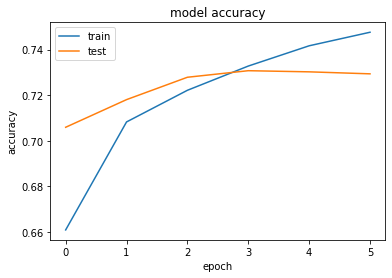

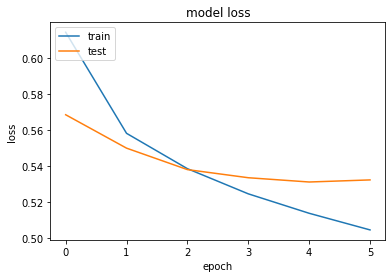

In [25]:
#визуализируем данные
plot_data = history.history
plt.plot(plot_data['acc']);
plt.plot(plot_data['val_acc']);
#добавляем пояснения
plt.title('model accuracy');
plt.ylabel('accuracy');
plt.xlabel('epoch');
plt.legend(['train','test'], loc='upper left');
plt.show();
#то же самое для целевой функции
plt.plot(plot_data['loss']);
plt.plot(plot_data['val_loss']);

plt.title('model loss');
plt.ylabel('loss');
plt.xlabel('epoch');
plt.legend(['train','test'], loc='upper left');
plt.show();

Когда точность на обучающей выборке начинает превосходить точность на валидационной выборке (и наоборот для целевой функции), это говорит о переобучении. Поэтому лучше выбрать такую модель, чья точность на валидационной выборке наибольшая (но при условии, что она близка к точности на обучающей выборке). Загрузим веса такой эпохи:

In [28]:
model = load_model('saved models\\saved-model-04.hdf5')

In [29]:
accuracy_list.append(model.evaluate(X_test, to_categorical(y_test), verbose=1)[1])
print('Accuracy:', accuracy_list[2])

19998/19998 [==============================] - 11s 532us/step
Accuracy: 0.727222740650177


Аналог predict_sentiment_bayes и predict_sentiment_svm:

In [30]:
def predict_sentiment_nn(sentences):
    sentences_vector = tokenizer.texts_to_sequences(sentences)
    sentences_vector = pad_sequences(sentences_vector, padding='post', maxlen=max_len)
    
    predictions_binary = model.predict(sentences_vector)
    #возвращаем второй столбец (так как он показывает, насколько позитивна тональность)
    return predictions_binary[:,1]
    
predict_sentiment_nn(['example tweet that isnt negative'])

array([0.33063692], dtype=float32)

## 3. Сравнение моделей по контрольным данным 

Еще раз выведем точности моделей на контрольной выборке:

In [34]:
models_names = ['Наивный Байес','Метод опорных векторов','Нейронная сеть']

for i,acc in enumerate(accuracy_list):
    print(models_names[i],'-',acc)

Наивный Байес - 0.7303230323032304
Метод опорных векторов - 0.7645764576457645
Нейронная сеть - 0.727222740650177


Покажем работу моделей:

In [35]:
_,data_test = train_test_split(data,test_size=0.2,random_state=42)
#возьмем 20 элементов из тестовой выборки
data_test = data_test.sample(n=20, random_state=32)
#улучшаем вид таблицы
data_test = data_test.rename(columns={'Sentiment':'Actual Sentiment'})
data_test = data_test.iloc[:,[1,0]]

#добавим в таблицу колонки с предсказаниями моделей
data_test['Sentiment (Bayes)'] = predict_sentiment_bayes(data_test['SentimentText'])
data_test['Sentiment (SVM)'] = predict_sentiment_svm(data_test['SentimentText'])
data_test['Sentiment (NN)'] = predict_sentiment_nn(data_test['SentimentText'])

data_test

,SentimentText,Actual Sentiment,Sentiment (Bayes),Sentiment (SVM),Sentiment (NN)
ItemID,,,,,
39719,"@andandbecks - You guys will win, I know it U...",1,1,1,0.699295
99097,@craigend I think I'm going to have to shell o...,0,0,1,0.648591
63441,@bluthngsx no i love you,1,1,1,0.765986
88991,@azzurrafm poo thats rubbish,0,0,0,0.193961
27239,"@aaronshust oh, I'm sorry. No, that's not glam...",1,1,0,0.167214
90396,@cloudsteph 'Fallon &amp; Byrne'... sounds lik...,1,1,0,0.374159
83056,@caseysevenfold I miss you too bby I can't sl...,0,0,0,0.281954
59396,@beilaq_sodmq wha happened ?,0,0,0,0.197316
32283,@alia1902 omg. you eating at fatty craabb?,0,1,0,0.556576


Для наглядности можно показать эту таблицу с помощью тепловой карты:

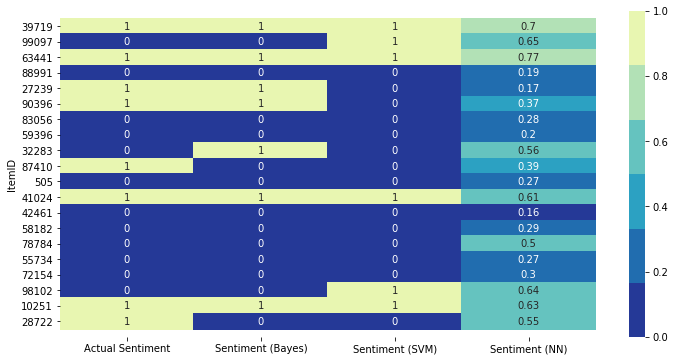

In [36]:
import seaborn as sns
#меняем размер выводимой таблицы
plt.figure(figsize=(12, 6))
#выводим таблицу в виде тепловой карты (колонку с текстом убираем)
ax = sns.heatmap(data_test.drop('SentimentText', axis=1), annot=True, 
                 cmap=sns.color_palette("YlGnBu_r"))
#исправление графического недочета (иначе бы таблица показалась не полностью)
i, k = ax.get_ylim()
ax.set_ylim(i+1, k-1);

Видно, что все алгоритмы неидеальны, но большую часть данных определяют верно.

## Заключение

Несмотря на то, что метод опорных векторов получил наибольшую точность на контольной выборке, 3% это некритичный перевес. Так что можно сказать, что все алгоритмы справляются с примерно одинаковым успехом.

Стоит сказать о достоинствах и недостатках каждого алгоритма:
 - наивный байесовский классификатор (НБК) и метод опорных векторов (МОВ) оба занимают мало времени на обучение;
 - НБК в нашем случае не требует настройки гиперпараметров;
 - НБК и МОВ не требуют большого количества данных для обучения, но МОВ требует больше ресурсов чем НБК, и может достичь более качественных результатов [7];
 - хоть нейронная сеть показала себя хуже всего (затратила намного больше времени и при этом не добилась лучшей точности), но она является самой гибкой из этой моделей. Кроме того, что можно попробовать найти параметры, при которых она будет лучше обучаться (поменять количество нейронов в слоях, изменить количество слоев и их функции активации), также можно попробовать другие архитектуры нейронный сетей (например, рекуррентные нейронный сети, но для них и ресурсов требуется больше).
 
В итоге можно сказать, что у нейронной сети больше всего потенциала, но НБК и МОВ более просты в реализации и быстрее. 

## Список использованных источников  

1. Воронцов К.В. Лекции по методу опорных векторов [Электронный ресурс]. URL: http://www.ccas.ru/voron/download/SVM.pdf (дата обращения - 04.05.2020)
2. Сверточные нейронные сети [Электронный ресурс]. URL: https://forany.xyz/a-392 (дата обращения - 04.05.2020)
3. Twitter sentiment analysis | Kaggle [Электронный ресурс]. URL: https://www.kaggle.com/c/twitter-sentiment-analysis2/ (дата обращения - 20.04.2020)
4. GloVe: Global Vectors for Word Representation [Электронный ресурс]. URL: https://nlp.stanford.edu/projects/glove/ (дата обращения - 23.04.2020)
5. Wikimedia Downloads [Электронный ресурс]. URL: https://dumps.wikimedia.org/ (дата обращения - 23.04.2020)
6. English Gigaword Fifth Edition - Linguistic Data Consortium [Электронный ресурс]. URL: https://catalog.ldc.upenn.edu/LDC2011T07 (дата обращения - 23.04.2020)
7. Акбархужаев, С. А. Сравнительный анализ методов Наивного Байеса и SVM алгоритмов при классификации текстовых документов / С. А. Акбархужаев, Н. Н. Абдурахманова. — Текст : непосредственный, электронный // Молодой ученый. — 2019. — № 29 (267). — С. 8-10. — URL: https://moluch.ru/archive/267/61568/ (дата обращения: 05.05.2020).